In [1]:
# Please don't change this cell, but do make sure to run it.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
answer_words = pd.read_csv('edited_data.csv')

In [2]:
def capitalize(variable):
    return variable.capitalize()

answer_words["Geography"] = answer_words["Geography"].apply(capitalize)

In [3]:
answer_words = answer_words.drop(columns = ["RowNumber", "Unnamed: 0"])


In [4]:
answer_words["CustomerId"].unique().shape[0]
answer_words = answer_words.set_index("CustomerId")

<AxesSubplot: ylabel='Frequency'>

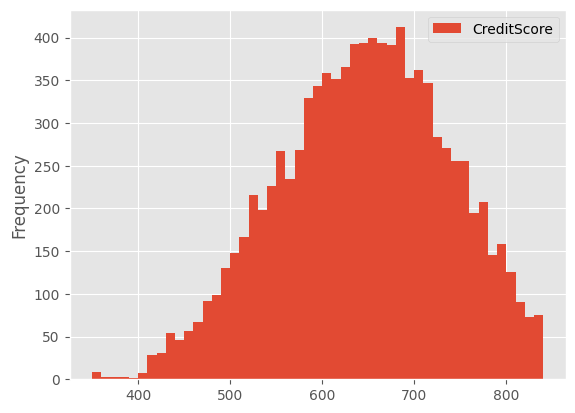

In [5]:
#Credit Score Distribution
answer_words = answer_words[answer_words["CreditScore"] <= 850]
answer_words.plot(kind="hist", x="Age", y="CreditScore", bins=np.arange(350,850, 10))

/var/folders/l7/bpy022dn1q71ws_q0dtvqst00000gn/T/ipykernel_65232/2020524973.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graph = answer_words.groupby("Tenure").sum()


,Tenure,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Proportions
0,0,268732,16149,32882105.28,595.6,267,219,4.216080e+07,95.0,0.230583
1,1,670665,40774,80995914.44,1543.5,700,569,1.037964e+08,230.0,0.222437
2,2,682590,40845,80428121.69,1663.9,737,559,1.028353e+08,200.0,0.191205
3,3,654898,39291,78020797.88,1545.9,728,524,9.848956e+07,211.0,0.209533
4,4,642907,37740,72928076.72,1499.8,708,499,9.844957e+07,203.0,0.205674
5,5,656826,39632,76895636.48,1570.2,698,503,1.021113e+08,209.0,0.207136
6,6,621044,37303,71290631.99,1462.2,690,495,9.532941e+07,195.0,0.203125
7,7,667114,39377,77532365.49,1573.1,726,534,1.039020e+08,177.0,0.172347
8,8,662078,39291,79455271.25,1551.5,739,519,1.032404e+08,195.0,0.190802
9,9,642697,38666,75337543.31,1513.2,691,470,9.771502e+07,213.0,0.216684


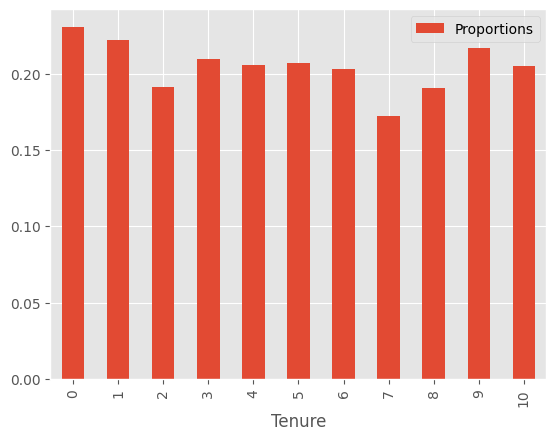

In [26]:
#Churn Rate by Tenure
prop = np.array([])
for i in np.arange(11):
    check = answer_words[answer_words.get("Tenure") == i]
    pro = check.get("Exited").sum()/check.shape[0]
    prop = np.append(prop, pro)
graph = answer_words.groupby("Tenure").sum()
graph = graph.assign(Proportions = prop)
graph = graph.reset_index()

graph.plot(kind = "bar", x = "Tenure", y = "Proportions")
graph


/var/folders/l7/bpy022dn1q71ws_q0dtvqst00000gn/T/ipykernel_65232/2138991630.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Over = answer_words.groupby("Age").sum().get("Exited").astype(np.int64)
/var/folders/l7/bpy022dn1q71ws_q0dtvqst00000gn/T/ipykernel_65232/2138991630.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  answer_words.groupby("Age").sum()


,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,
18,15107,106,1741730.65,33.0,14,13,1872252.57,2.0
19,17972,137,1903568.57,37.1,22,15,2638820.71,1.0
20,26602,203,3041555.60,62.0,26,19,3908221.68,2.0
21,34306,253,4024124.79,88.2,38,32,5434443.71,3.0
22,53470,477,5729954.90,128.3,58,46,8259015.70,12.0
...,...,...,...,...,...,...,...,...
83,678,6,123356.63,1.0,0,1,92934.41,0.0
84,945,16,180115.73,2.0,1,1,374720.50,1.0
85,787,10,0.00,2.0,1,1,116537.96,0.0


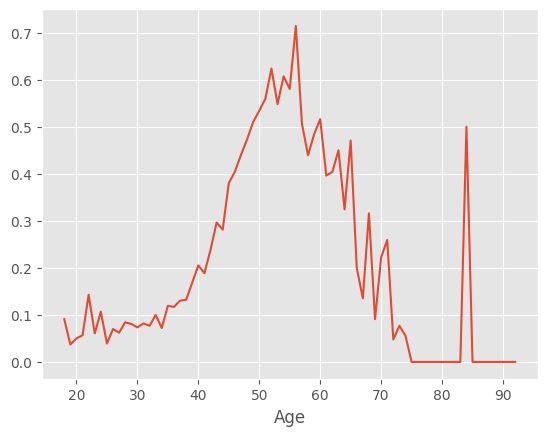

In [29]:
#Percentage Churn by age
Under = answer_words.groupby("Age").count().get("Exited")
Over = answer_words.groupby("Age").sum().get("Exited").astype(np.int64)
a = Over/Under
j = np.array([])
j = a
j.plot(kind = "line")

#graphs = Work.assign(Props = a)
#graph = graph.assign(Proportions = prop)
#graph = graph.reset_index()

#graph.plot(kind = "scatter", x = "Age", y = "Proportions")
#graph
answer_words.groupby("Age").sum()

/var/folders/l7/bpy022dn1q71ws_q0dtvqst00000gn/T/ipykernel_65232/3269791514.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Over = answer_words.groupby("CreditScore").sum().get("Exited")#.astype(np.int64)


<AxesSubplot: xlabel='CreditScore', ylabel='ChurnNumber'>

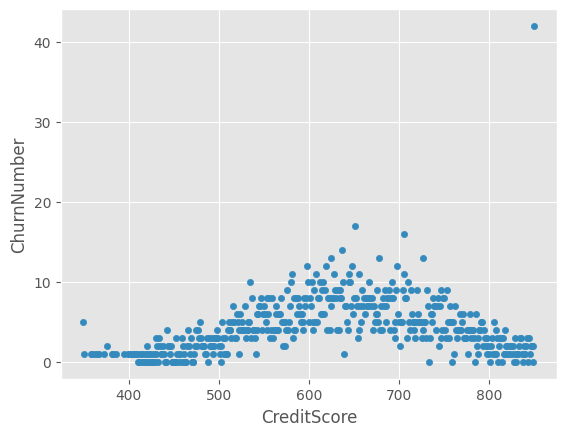

In [80]:
#Percentage Churn by Credit Score
Under = answer_words.groupby("CreditScore").count().get("Exited")
Over = answer_words.groupby("CreditScore").sum().get("Exited")#.astype(np.int64)
a = Over
j = np.array([])
j = a
dat = pd.DataFrame().assign(ChurnNumber = j)
dat = dat.reset_index()
dat.plot(kind = "scatter", x = "CreditScore", y = "ChurnNumber")#, bins=np.arange(350,850, 10))

#answer_words.groupby("CreditScore").sum()
#dat
#j.plot(kind = "line")

/var/folders/l7/bpy022dn1q71ws_q0dtvqst00000gn/T/ipykernel_65232/2882329984.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Over = answer_words.groupby("CreditScore").sum().get("Exited")#.astype(np.int64)


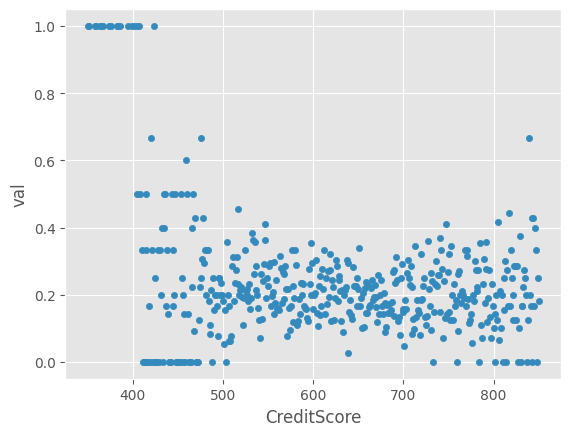

In [81]:
#Percentage Churn by Credit Score
Under = answer_words.groupby("CreditScore").count().get("Exited")
Over = answer_words.groupby("CreditScore").sum().get("Exited")#.astype(np.int64)
a = Over/Under
j = np.array([])
j = a
dat = pd.DataFrame().assign(val = j)
dat = dat.reset_index()
dat.plot(kind = "scatter", x = "CreditScore", y = "val")#, bins=np.arange(350,850, 10))
dat.to_csv('file_name.csv')


#answer_words.groupby("CreditScore").sum()
#dat
#j.plot(kind = "line")

In [19]:
zeroZ = answer_words[(answer_words["Exited"] == 0) & (answer_words["IsActiveMember"] == 0)].shape[0]
zeroO = answer_words[(answer_words["Exited"] == 0) & (answer_words["IsActiveMember"] == 1)].shape[0]
oneZ = answer_words[(answer_words["Exited"] == 1) & (answer_words["IsActiveMember"] == 0)].shape[0]
oneO = answer_words[(answer_words["Exited"] == 1) & (answer_words["IsActiveMember"] == 1)].shape[0]
a = zeroZ/(zeroZ+oneO+oneZ+zeroO)
b = zeroO/(zeroZ+oneO+oneZ+zeroO)
c = oneZ/(zeroZ+oneO+oneZ+zeroO)
d = oneO/(zeroZ+oneO+oneZ+zeroO)
print("Have not Exited and are not active " + str(a))
print("Have not Exited and are active " + str(b))
print("Have Exited and are not active " + str(c))
print("Have Exited and are active " + str(d))

Have not Exited and are not active 0.35490668272125225
Have not Exited and are active 0.4416014449127032
Have Exited and are not active 0.12984146096728877
Have Exited and are active 0.07365041139875576


In [10]:
answer_words

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1.0
15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0.0
15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0.0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.1,1,1,79084.10,0.0
15592531,Bartlett,822,France,Male,50,7,0.00,2.1,1,1,10062.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0,96270.64,0.0
15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1,101699.77,0.0
15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1,42085.58,1.0


In [11]:
answer_words["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [30]:
answer_words["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [49]:
answer_words[answer_words.get("CreditScore") == 850].get("Exited").count()

232

/var/folders/l7/bpy022dn1q71ws_q0dtvqst00000gn/T/ipykernel_65232/2076575496.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Over = answer_words.groupby("EstimatedSalary").sum().get("Exited")#.astype(np.int64)


<AxesSubplot: xlabel='EstimatedSalary', ylabel='val'>

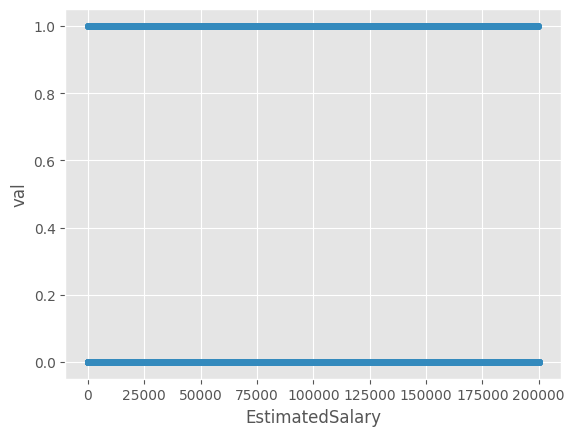

In [73]:
#answer_words.get("EstimatedSalary")
#Percentage Churn by Credit Score
Under = answer_words.groupby("EstimatedSalary").count().get("Exited")
Over = answer_words.groupby("EstimatedSalary").sum().get("Exited")#.astype(np.int64)
a = Over/Under
dat = pd.DataFrame().assign(val = a)
dat = dat.reset_index()
dat.plot(kind = "scatter", x = "EstimatedSalary", y = "val")
#answer_words.groupby("CreditScore").sum()
#dat
#j.plot(kind = "line")
#a.plot(kind = "line")